In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:

df_raw = pd.read_csv("netflix.csv")
df_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Summary of the DataSet

In [3]:
df_raw.shape

(8807, 12)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### No. of Null Values

In [5]:
df_raw.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

 So columns containing null values are,
 * director
 * cast
 * country
 * date_added
 * rating
 * duration


In [6]:
df_raw['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

So, the dataset contains two types of products. Movies and Tv Shows.

# Genre Analysis

Let's analyze different genres first

In [7]:
df_genre = df_raw[['show_id','type','country', 'release_year', 'duration', 'listed_in']]
df_genre.head()

,show_id,type,country,release_year,duration,listed_in
0,s1,Movie,United States,2020,90 min,Documentaries
1,s2,TV Show,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,NaN,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,NaN,2021,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [8]:
df_genre['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

Now, we want in a form so that each genre gets each cell in the dataframe. Then it would be easier to visualize te frequency

In [9]:
genre_lst = df_genre['listed_in'].apply(lambda x: str(x).split(", ")).tolist()
genre_lst

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Docuseries', 'Reality TV'],
 ['International TV Shows', 'Romantic TV Shows', 'TV Comedies'],
 ['TV Dramas', 'TV Horror', 'TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['British TV Shows', 'Reality TV'],
 ['Comedies', 'Dramas'],
 ['Crime TV Shows', 'Docuseries', 'International TV Shows'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Dramas', 'International Movies'],
 ['Children & Family Movies', 'Comedies'],
 ['British TV Shows', 'Crime TV Shows', 'Docuseries'],
 ['TV Comedies', 'TV Dramas'],
 ['Documentaries', 'International Movies'],
 ['Crime TV Shows', 'Spanish-Language TV Shows', 'TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  'Spanish-Language TV Shows',
  'TV Action & Adventure'],
 ['Crime TV Shows', 'Docuseries', 'International

Thus this list contains basically all the genres of all the shows and movies. The inner brackets contain the genre of individual shows and movies.<br>
If we now make a dataframe out of this list of lists. Then the elements of the inner lists will get placed in different columns.

In [10]:
df_genre_melted = pd.DataFrame(genre_lst,index = df_genre['show_id'])
df_genre_melted

,0,1,2
show_id,,,
s1,Documentaries,None,None
s2,International TV Shows,TV Dramas,TV Mysteries
s3,Crime TV Shows,International TV Shows,TV Action & Adventure
s4,Docuseries,Reality TV,None
s5,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
s8803,Cult Movies,Dramas,Thrillers
s8804,Kids' TV,Korean TV Shows,TV Comedies
s8805,Comedies,Horror Movies,None


## stacking :
As we have multiple columns for a single index vaalue ie. a show id here. We are going to melt the dataframe so that we can create a single column dataframe with all the data of 3 columns get stacked one over another. Naturally the dataframe will contain a multi-level index column also.

In [11]:
df_genre_new = pd.DataFrame(df_genre_melted.stack()).reset_index()
df_genre_new

,show_id,level_1,0
0,s1,0,Documentaries
1,s2,0,International TV Shows
2,s2,1,TV Dramas
3,s2,2,TV Mysteries
4,s3,0,Crime TV Shows
...,...,...,...
19318,s8806,0,Children & Family Movies
19319,s8806,1,Comedies
19320,s8807,0,Dramas
19321,s8807,1,International Movies


Here level_1 column gets created due to stacking, but we dont need it so lets drop it. And also the column0 is basically the required genres column.

In [12]:
df_genre_new.rename(columns={0:'genre'}, inplace=True)
df_genre_new.drop(['level_1'], axis=1, inplace=True)


In [13]:
df_genre_new.head()

,show_id,genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows


In [14]:
df_genre_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   show_id  19323 non-null  object
 1   genre    19323 non-null  object
dtypes: object(2)
memory usage: 302.0+ KB


To get an idea about all the genres, lets create a csv file so that we can inspect it in MS Excel.

In [15]:
#df_genre_new.to_csv('df_genre_new.csv')

Now, for example TV Dramas and Dramas are no different genres. So, lets try to filter the genre section a bit before try to visualize the it 

In [16]:
df_genre_new['genre'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [17]:
to_keep = ['Mysteries','Action','Anime','Dramas','Comedies','Sci-Fi','Crime','Thrillers','Reality',"Kids'",'Documentaries','Docuseries','Family','Horror','Romantic', 'Sports', 'Science','Musicals','Classic','Cult','Stand-Up']

to_remove = ['International Movies','Independent Movies','British TV Shows', 'Korean TV Shows','International TV Shows','TV Shows','Spanish-Language TV Shows','Movies','Teen TV Shows' ]

The movies listed under to_remove list, are not particularly of any genre. So, we are going to remove these specific rows for now.

In [18]:
sum = 0
for item in to_remove:
    idx = list(df_genre_new.index[df_genre_new['genre'] == item])
    sum += len(idx)
    print(len(idx))

print(f'Total rows to be removed',sum)

2752
756
253
151
1351
16
174
57
69
Total rows to be removed 5579


So, total rows to be removed are 5579 out of total 19323, ie. almost 29 % of the data are gonna get removed which is a significant loss but to look at the genre properly, we have to do it.

In [19]:
df_genre_new.shape

(19323, 2)

In [20]:
for item in to_remove:
    idx = list(df_genre_new.index[df_genre_new['genre'] == item])
    df_genre_new.drop(idx,axis=0, inplace=True)

In [21]:
df_genre_new.shape

(13744, 2)

Thus the unwanted to_remove list elements are removed successfully.

In [22]:
for item in df_genre_new['genre']:
    word_lst = item.split(' ')
    for element in to_keep:
        if element in word_lst :
            df_genre_new['genre'][df_genre_new['genre'] == item] = element
            break

In [23]:
df_genre_new['genre'].unique()

array(['Documentaries', 'Dramas', 'Mysteries', 'Crime', 'Action',
       'Docuseries', 'Reality', 'Romantic', 'Comedies', 'Horror',
       'Family', 'Thrillers', 'Musicals', 'Sci-Fi', "Kids'", 'Classic',
       'Anime', 'Sports', 'Science', 'Cult', 'Faith & Spirituality',
       'LGBTQ Movies', 'Stand-Up'], dtype=object)

More fine tuning like Classic, Cult, Faith n spirituality, LGBTQ movies all will be under Culture n Society genre. Then 'Mysteries and Thrillers and Crime all under 'Thriller' genre. 'Documenteries' and 'Docuseries are under Documenteries genre. Kids and Family will be under a single genre.

In [24]:
df_genre_new['genre'][df_genre_new['genre'] == 'Docuseries'] = 'Documentaries'
df_genre_new['genre'][df_genre_new['genre'] == 'Mysteries'] = 'Thrillers'
df_genre_new['genre'][df_genre_new['genre'] == 'Crime'] = 'Thrillers'
df_genre_new['genre'][df_genre_new['genre'] == 'Stand-Up'] = 'Comedies'
df_genre_new['genre'][df_genre_new['genre'] == "Kids'" ] = 'Family'
df_genre_new['genre'][df_genre_new['genre'] == "Classic"] = 'Culture and Society'
df_genre_new['genre'][df_genre_new['genre'] == 'Cult' ] = 'Culture and Society'
df_genre_new['genre'][df_genre_new['genre'] == 'Faith & Spirituality'] = 'Culture and Society'
df_genre_new['genre'][df_genre_new['genre'] == 'LGBTQ Movies'] = 'Culture and Society'

In [25]:
df_genre_new['genre'].unique()

array(['Documentaries', 'Dramas', 'Thrillers', 'Action', 'Reality',
       'Romantic', 'Comedies', 'Horror', 'Family', 'Musicals', 'Sci-Fi',
       'Culture and Society', 'Anime', 'Sports', 'Science'], dtype=object)

Thus these are the final genres on which we going to focus. 

In [26]:
df_genre_new.head()

,show_id,genre
0,s1,Documentaries
2,s2,Dramas
3,s2,Thrillers
4,s3,Thrillers
6,s3,Action


As we already built a cleaned genre column so we are going to remove the unstructured 'listed in' column.

In [27]:
df_genre_new2 = df_genre.drop(['listed_in'], axis=1)
df_genre_new2.head()

,show_id,type,country,release_year,duration
0,s1,Movie,United States,2020,90 min
1,s2,TV Show,South Africa,2021,2 Seasons
2,s3,TV Show,NaN,2021,1 Season
3,s4,TV Show,NaN,2021,1 Season
4,s5,TV Show,India,2021,2 Seasons


So, now lest merge the two table 

In [28]:
df_genre_final = df_genre_new.merge(df_genre_new2, on='show_id', how='left')
df_genre_final

,show_id,genre,type,country,release_year,duration
0,s1,Documentaries,Movie,United States,2020,90 min
1,s2,Dramas,TV Show,South Africa,2021,2 Seasons
2,s2,Thrillers,TV Show,South Africa,2021,2 Seasons
3,s3,Thrillers,TV Show,NaN,2021,1 Season
4,s3,Action,TV Show,NaN,2021,1 Season
...,...,...,...,...,...,...
13739,s8805,Horror,Movie,United States,2009,88 min
13740,s8806,Family,Movie,United States,2006,88 min
13741,s8806,Comedies,Movie,United States,2006,88 min
13742,s8807,Dramas,Movie,India,2015,111 min


Thus the final dataframe is created to visualize the genre of the movies released along with other parameters like type and states and all.

Lets first simply look at the frequency of the genre column.

In [29]:
df_genre_vis = pd.DataFrame(df_genre_final.genre.value_counts())
df_genre_vis.rename(columns={'genre':'freq'}, inplace=True)
df_genre_vis.index.names=['index']
df_genre_vis['genre'] = df_genre_vis.index
df_genre_vis = df_genre_vis.sort_values('genre')
df_genre_vis

,freq,genre
index,,
Action,1027,Action
Anime,247,Anime
Comedies,2654,Comedies
Culture and Society,382,Culture and Society
Documentaries,1264,Documentaries
Dramas,3190,Dramas
Family,1092,Family
Horror,432,Horror
Musicals,375,Musicals


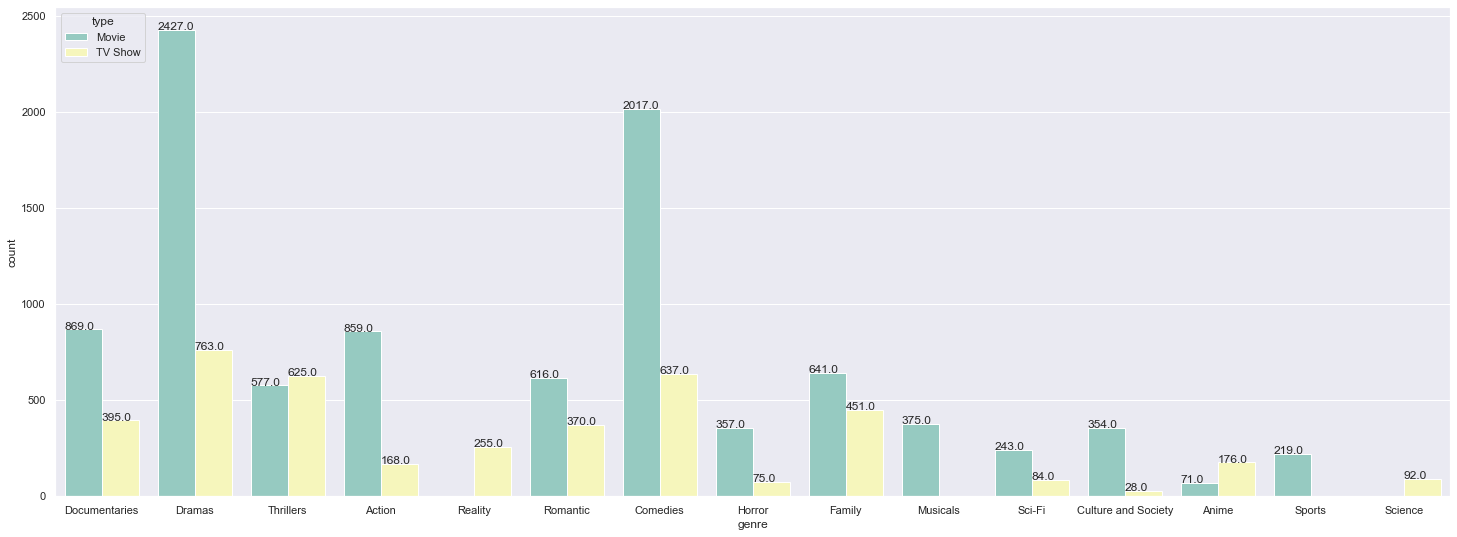

In [53]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set_theme(style='darkgrid')

ax = sns.countplot(x='genre', hue='type', data=df_genre_final, palette='Set3')

for p in ax.patches :
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.05))

So, the amount of product released or added in Netflix depends a lot on the genre of the product. And its very clear that movies get released way more than TV Shows in Netflix while, in genral, it often seems that it's the amazing TV Shows which rise Netflix to this level where it belongs.<br> 
<p>And if we wanna see different genre counts for movies and tv shows individually, we better divide the dataset for two types of shows.

In [91]:
show_genre = df_genre_final.loc[df_genre_final['type'] == 'TV Show'].drop(['type'], axis=1).sort_values('genre')
show_genre.head()

,show_id,genre,country,release_year,duration
4200,s2629,Action,United Kingdom,2020,4 Seasons
2098,s1299,Action,South Korea,2021,1 Season
3864,s2416,Action,"United States, Mexico, Spain, Malta",2018,4 Seasons
3845,s2406,Action,United States,2020,5 Seasons
6889,s4366,Action,Canada,2018,3 Seasons


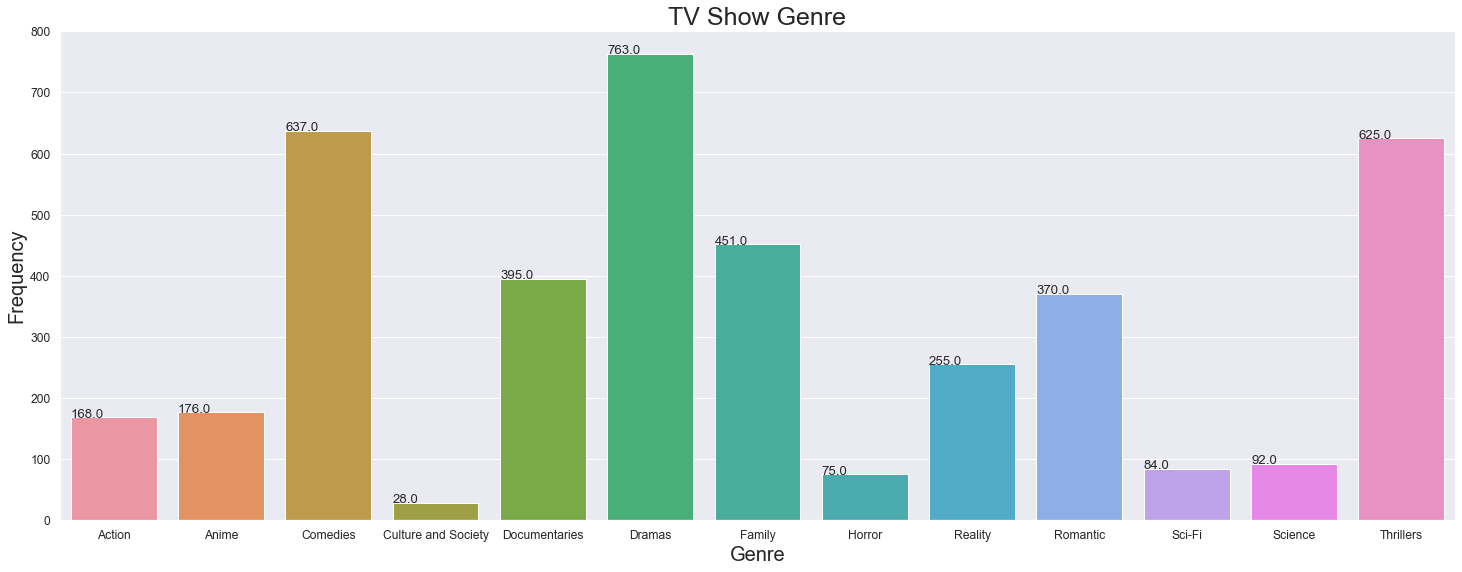

In [92]:
sns.set(font_scale = 1.1)
ax = sns.countplot(x='genre', data=show_genre)

ax.set_title('TV Show Genre', fontsize = 25)
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
for p in ax.patches :
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

In [89]:
movie_genre = df_genre_final.loc[df_genre_final['type'] == 'Movie'].drop(['type'], axis=1).sort_values('genre')
movie_genre.head()

,show_id,genre,country,release_year,duration
7470,s4731,Action,India,2016,168 min
11014,s7072,Action,United States,1989,127 min
11017,s7073,Action,United States,1981,116 min
2251,s1397,Action,United States,2013,100 min
11020,s7074,Action,United States,1984,119 min


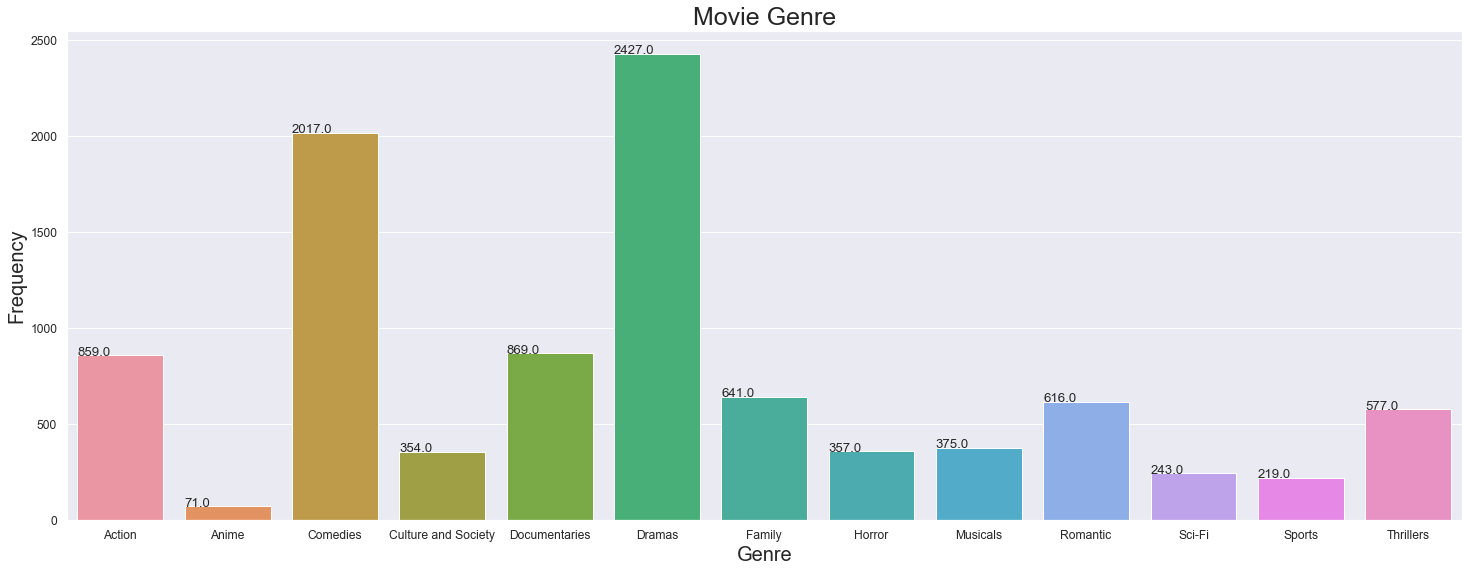

In [90]:
sns.set(font_scale = 1.1)
ax = sns.countplot(x='genre', data=movie_genre)

ax.set_title('Movie Genre', fontsize = 25)
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
for p in ax.patches :
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

So, we can clearly see the genre differences between movies and tv shows. Like for example in thriller genre the difference is very clear. Again, for drama genre both types of products get released in an equal amount. Here the numerical values DO NOT represent the exact number of shows released as, one single show may be considered under different genre sections. So, this analysis is just to get an in depth idea how genre to genre release amount differs. Its more like a comparison rather than an exact amount of releases.

# Country Dependency

In [94]:
df_country = df_raw[['show_id','type','country']]
df_country

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s3,TV Show,NaN
3,s4,TV Show,NaN
4,s5,TV Show,India
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,NaN
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [96]:
df_country['country'].isnull().sum()

831

In [98]:
df_country = df_country.dropna(axis=0, how='any')
df_country['country'].isnull().sum()

0

We successfully removed the rows containing null values for Country column. Now lets look how many different countries are registered in the dataset.

In [105]:
df_country.country.unique()

array(['United States', 'South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom,

In [102]:
len(df_country.country.unique())

748

But here more than one country are assigned for a single product id or show id. So, we need to unnest it first.

In [106]:
country_lst = df_country['country'].apply(lambda x: str(x).split(", ")).tolist()
country_lst

[['United States'],
 ['South Africa'],
 ['India'],
 ['United States',
  'Ghana',
  'Burkina Faso',
  'United Kingdom',
  'Germany',
  'Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['Germany', 'Czech Republic'],
 ['United States'],
 ['Mexico'],
 ['Turkey'],
 ['India'],
 ['Australia'],
 ['United States'],
 ['United States'],
 ['United States', 'India', 'France'],
 ['United Kingdom'],
 ['Finland'],
 ['China', 'Canada', 'United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['South Africa', 'United States', 'Japan'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United Kingdom'],
 ['India'],
 ['United States'],
 ['India'],
 ['United Kingdom'],
 ['Nigeria'],
 ['Japan'],
 ['United States'],
 ['United States'],
 ['Nigeria'],
 ['Spain', 'United S

In [107]:
df_country_melted = pd.DataFrame(country_lst,index = df_country['show_id'])
df_country_melted

,0,1,2,3,4,5,6,7,8,9,10,11
show_id,,,,,,,,,,,,
s1,United States,None,None,None,None,None,None,None,None,None,None,None
s2,South Africa,None,None,None,None,None,None,None,None,None,None,None
s5,India,None,None,None,None,None,None,None,None,None,None,None
s8,United States,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia,None,None,None,None,None,None
s9,United Kingdom,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
s8802,United Arab Emirates,Jordan,None,None,None,None,None,None,None,None,None,None
s8803,United States,None,None,None,None,None,None,None,None,None,None,None
s8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [117]:
df_country_new = pd.DataFrame(df_country_melted.stack()).reset_index()
df_country_new.head()

,show_id,level_1,0
0,s1,0,United States
1,s2,0,South Africa
2,s5,0,India
3,s8,0,United States
4,s8,1,Ghana


In [118]:
df_country_new.rename(columns={0:'country'}, inplace=True)
df_country_new.drop(['level_1'], axis=1, inplace=True)
df_country_new

,show_id,country
0,s1,United States
1,s2,South Africa
2,s5,India
3,s8,United States
4,s8,Ghana
...,...,...
10009,s8802,Jordan
10010,s8803,United States
10011,s8805,United States
10012,s8806,United States


In [122]:
df_country_freq = pd.DataFrame(df_country_new['country'].value_counts()).sort_index()
df_country_freq.head()

,country
,2
Afghanistan,1
Albania,1
Algeria,3
Angola,1


In [123]:
df_country_freq.rename(columns={'country':'freq'}, inplace=True)
df_country_freq.index.names=['index']
df_country_freq['country'] = df_country_freq.index
df_country_freq = df_country_freq.sort_values('country')
df_country_freq

,freq,country
index,,
,2,
Afghanistan,1,Afghanistan
Albania,1,Albania
Algeria,3,Algeria
Angola,1,Angola
...,...,...
Vatican City,1,Vatican City
Venezuela,4,Venezuela
Vietnam,7,Vietnam


In [127]:
idx = list(df_country_freq.index[df_country_freq['freq'] == 2])
df_country_freq.drop(idx, axis=0, inplace=True)
df_country_freq

,freq,country
index,,
Afghanistan,1,Afghanistan
Albania,1,Albania
Algeria,3,Algeria
Angola,1,Angola
Argentina,91,Argentina
...,...,...
Vatican City,1,Vatican City
Venezuela,4,Venezuela
Vietnam,7,Vietnam


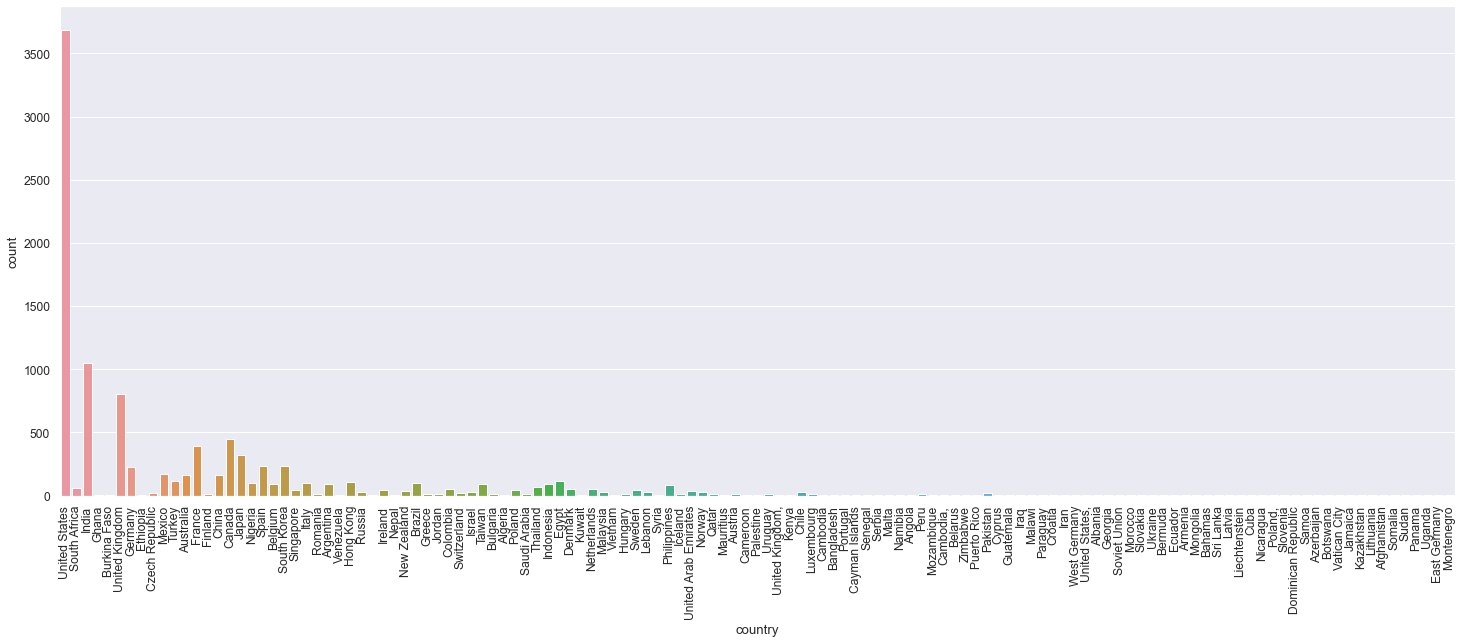

In [130]:
ax = sns.countplot(x='country', data=df_country_new)
ax.tick_params(axis='x', rotation=90)

This simple countplot may seem meaningless but it shows that Netflix is popular only in 2 to 3 countries basically. 